## 6. Take a binary image and a structuring element to perform the following morphological operations –


In [1]:

import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

### Load the image 

The shape of the image : (238, 315)


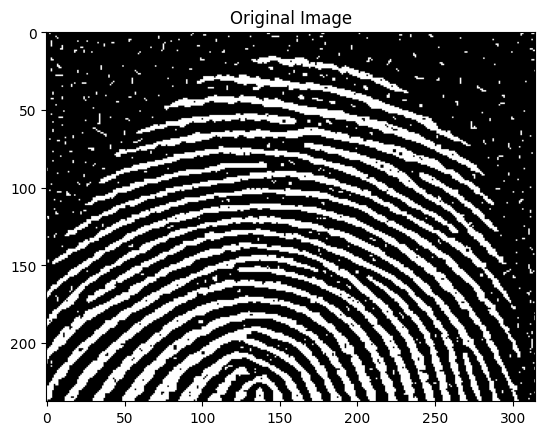

min intensity level : 0
max intensity level : 255


In [2]:
original_image = cv2.imread("images6/finger_print.tif", cv2.IMREAD_GRAYSCALE)
print(f"The shape of the image : {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.show()

print(f"min intensity level : {np.min(original_image)}")
print(f"max intensity level : {np.max(original_image)}")

### Function for Erosion

In [3]:
def erosion(input_image, st_element):
    st_element =( st_element * 255 ).astype(np.uint8)

    height, width = input_image.shape 
    st_height , st_width = st_element.shape
    pad = st_height // 2


    #Pad the image to handle border pixels 
    padded_image = np.pad(input_image, pad_width=pad, mode='constant', constant_values=0)
    output_image = np.zeros_like(input_image, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            neighbouhood = padded_image[i: i+st_height, j: j+st_width]


            # Check if structuring element fits (all 255s in SE match 255s in image)
            match = (st_element == 255)
            if np.all(neighbouhood[match] == 255):
                output_image[i,j] = 255 
            else:
                output_image[i,j] = 0 


    return output_image             

 



### Apply erosion 

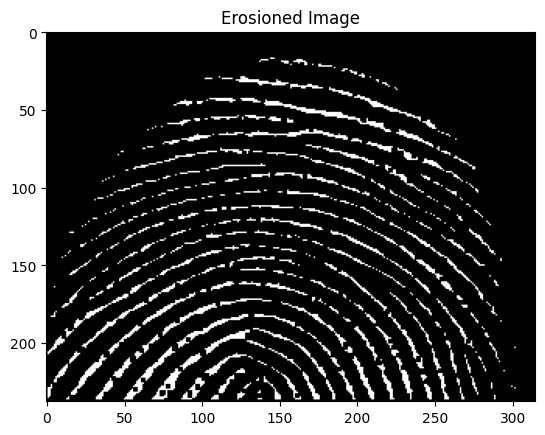

In [4]:
structuring_element = np.ones((3,3))
erosioned_image = erosion(original_image, structuring_element)
plt.imshow(erosioned_image, cmap='gray')
plt.title("Erosioned Image")
plt.show()

### Dilation Function 

In [5]:
def dilation(input_image, st_element):
    st_element = (st_element*255).astype(np.uint8)

    height, width = input_image.shape 
    st_height, st_width = st_element.shape
    pad = st_height // 2

    padded_image = np.pad(input_image, pad_width=pad, mode= 'constant', constant_values=0 )
    output_image =  np.zeros_like(input_image, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            neibourhood = padded_image[i : i+ st_height, j : j+ st_width]

            match = (st_element == 255)
            if np.any(neibourhood[match] == 255):
                output_image[i,j] = 255 
            else:
                output_image[i,j] = 0 

    return output_image

### Apply Dilation 

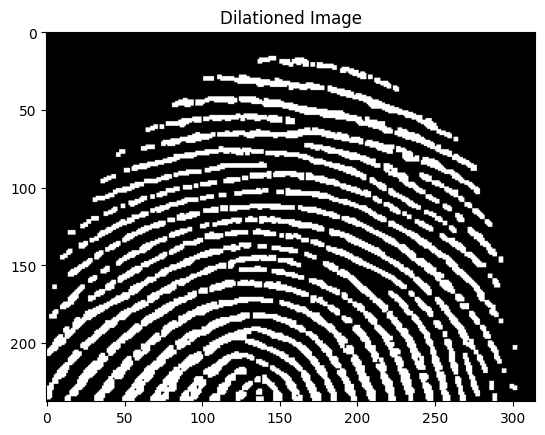

In [6]:
structuring_element = np.ones((3,3))
dilationed_image = dilation(erosioned_image, structuring_element)
plt.imshow(dilationed_image, cmap='gray')
plt.title("Dilationed Image")
plt.show()

### (b) Opening and Closing operations

### Opening Function 

In [7]:
def opening(images, st_element):
    return dilation(erosion(images, st_element), st_element)

### Closing Operation 

In [8]:
def closing (images, st_element):
    return erosion(dilation(images, st_element), st_element)

### Apply Opening

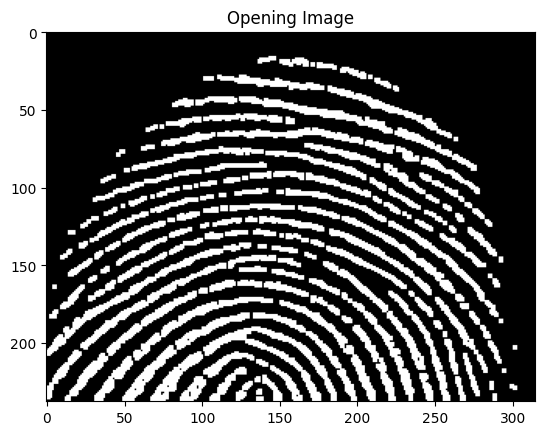

In [9]:
st_element = np.ones((3,3))
opening_image = opening(original_image, st_element)
plt.imshow(opening_image, cmap='gray')
plt.title("Opening Image")
plt.show()

### Apply Closing Image

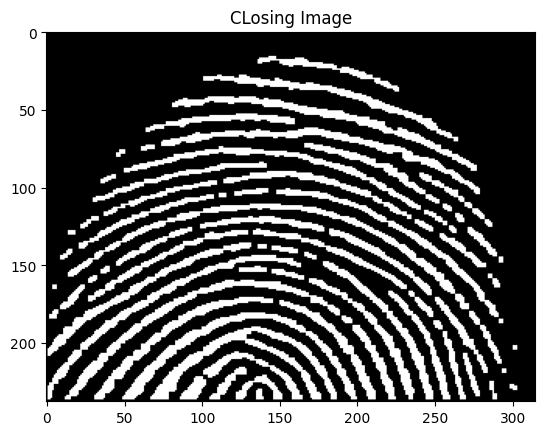

In [10]:
st_element = np.ones((3,3))
closing_image = closing(opening_image, st_element)
plt.imshow(closing_image, cmap='gray')
plt.title("CLosing Image")
plt.show()